In [1]:
from sklearn.datasets import load_iris
import pandas as pd

# fetching the iris dataset 

iris = load_iris()
dir(iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [2]:
# converting the dataset into pandas 

df = pd.DataFrame(iris.data, columns = iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [43]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [3]:
# Since we are performing K-means, we are only picking petal features

df_iris = df.drop(['sepal length (cm)','sepal width (cm)'],axis="columns")
df_iris.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


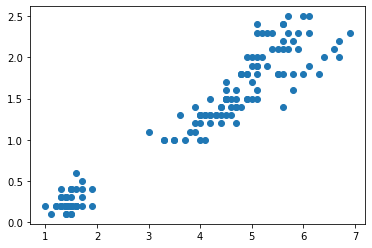

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(df_iris['petal length (cm)'],df_iris['petal width (cm)'])
plt.show()

In [5]:
# implementing KMeans

from sklearn.cluster import KMeans
km = KMeans(n_clusters = 3)

In [6]:
y_predicted = km.fit_predict(df_iris)
y_predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [7]:
df_iris['target'] = y_predicted
df_iris.head()

,petal length (cm),petal width (cm),target
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0


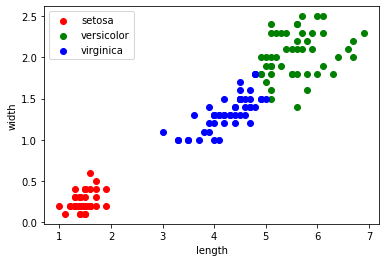

In [44]:
df0 = df_iris[df_iris.target == 0]
df1 = df_iris[df_iris.target == 1]
df2 = df_iris[df_iris.target == 2]

plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'] , color = "r", label = "setosa")
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'] , color = "g", label = "versicolor")
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'] , color = "b", label = "virginica")


plt.xlabel("length")
plt.ylabel("width")
plt.legend()
plt.show()

In [13]:
km.cluster_centers_

array([[1.462     , 0.246     ],
       [5.59583333, 2.0375    ],
       [4.26923077, 1.34230769]])

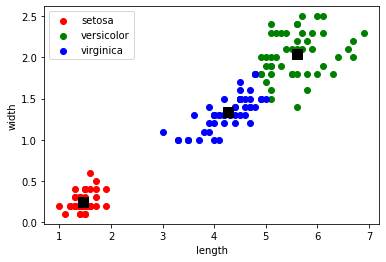

In [45]:
df0 = df_iris[df_iris.target == 0]
df1 = df_iris[df_iris.target == 1]
df2 = df_iris[df_iris.target == 2]

plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'] , color = "r", label = "setosa")
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'] , color = "g", label = "versicolor")
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'] , color = "b", label = "virginica")

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], color = "black" , s=100 , marker='s')

plt.xlabel("length")
plt.ylabel("width")
plt.legend()
plt.show()

In [18]:
# The above plot looks good, but for understanding purpose , we are implementing MinMaxScaller

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_iris['petal length (cm)'] = scaler.fit_transform(df_iris[['petal length (cm)']])
df_iris['petal width (cm)'] = scaler.fit_transform(df_iris[['petal width (cm)']])
df_iris.head()

,petal length (cm),petal width (cm),target
0,0.067797,0.041667,1
1,0.067797,0.041667,1
2,0.050847,0.041667,1
3,0.084746,0.041667,1
4,0.067797,0.041667,1


In [37]:
df_iris.head()

,petal length (cm),petal width (cm)
0,0.067797,0.041667
1,0.067797,0.041667
2,0.050847,0.041667
3,0.084746,0.041667
4,0.067797,0.041667


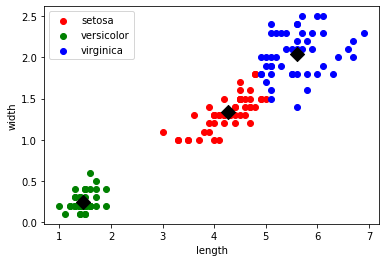

In [48]:
scaler_predicted = km.fit_predict(df_iris)
df_iris['scalerTarget'] = scaler_predicted

df3 = df_iris[df_iris.scalerTarget == 0]
df4 = df_iris[df_iris.scalerTarget == 1]
df5 = df_iris[df_iris.scalerTarget == 2]

plt.scatter(df3['petal length (cm)'],df3['petal width (cm)'] , color = "r", label = "setosa")
plt.scatter(df4['petal length (cm)'],df4['petal width (cm)'] , color = "g", label = "versicolor")
plt.scatter(df5['petal length (cm)'],df5['petal width (cm)'] , color = "b", label = "virginica")

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], s=100, color = "black" , marker = "D")
plt.xlabel("length")
plt.ylabel("width")
plt.legend()
plt.show()

In [50]:
km.cluster_centers_

array([[ 4.26923077e+00,  1.34230769e+00,  2.00000000e+00,
         2.00000000e+00],
       [ 1.46200000e+00,  2.46000000e-01, -2.22044605e-16,
        -2.22044605e-16],
       [ 5.59583333e+00,  2.03750000e+00,  1.00000000e+00,
         1.00000000e+00]])